# Analysis -  Mouse Gastrulation - Pseudotime #
#### stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
#### celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
####                    'Haematoendothelial progenitors','Blood progenitors 1'}
#### Using all 2000 genes to plot cell velocity

In [2]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from celldancer.sampling import *
import pandas as pd
from celldancer.plotting.colormap import *
import random
import os
from celldancer.utilities import get_gene_s0_by_time

# Load Data

In [8]:
# load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv')
cellDancer_df=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/celldancer_estimation.csv')
# define output path
#output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'

In [9]:
load_cellDancer

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880


## Coumpute and visualize the prediction in embedding space

The prediction in the embedding space could be calculated with ```celldancer.compute_cell_velocity.compute()```. If not specified, all genes in cellDancer_df will be used to calculate the prediction in the embedding space. Following the method of [velocyto](https://velocyto.org/velocyto.py/index.html) and [scVelo](https://scvelo.readthedocs.io/), we project the velocity vectors of the cells into the low-dimensional embedding space.

After the calculation, the predicted direction in the embedding space, i.e. columns 'velocity1' and 'velocity2' will be added to the original dataframe. ```celldancer.plotting.cell.scatter_cell()``` could be used to display the predicted direction in embedding space.

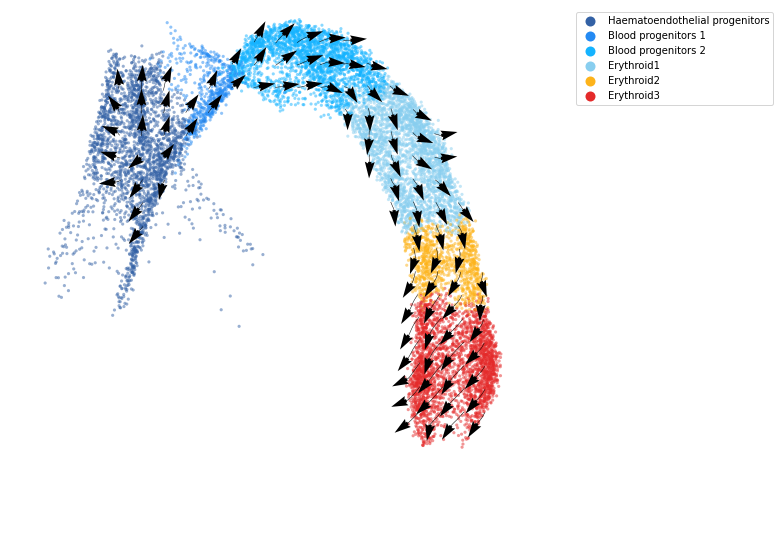

In [10]:
# compute cell velocity
cellDancer_df=cd.compute_cell_velocity.compute(cellDancer_df=cellDancer_df, projection_neighbor_choice='gene', expression_scale='power10', projection_neighbor_size=10, speed_up=(100,100))

# plot cell velocity
fig, ax = plt.subplots(figsize=(10,10))
cdplt.cell.scatter_cell(ax,
                        cellDancer_df, 
                        colors=cdplt.colormap.colormap_erythroid, 
                        alpha=0.5, 
                        s=10,
                        velocity=True,
                        legend='on',
                        min_mass=15,
                        arrow_grid=(20,20),
                        custom_xlim=[-6,13], 
                        custom_ylim=[2,16], )
ax.axis('off')
plt.show()

In [11]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069,2,0.076165,0.062329
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825,3,NaN,NaN
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN


## Estimate Pseudotime

Based on the prediction in embedding space, the pseudotime could be estimated with ```celldancer.pseudo_time.pseudo_time()```.

In [12]:
%%capture

# set parameters
dt = 0.05
t_total = {dt:int(10/dt)} 
n_repeats = 10

# estimate pseudotime
cellDancer_df = cd.pseudo_time.pseudo_time(cellDancer_df=cellDancer_df, 
                                          grid=(20,20), 
                                          dt=dt, 
                                          t_total=t_total[dt], 
                                          n_repeats=n_repeats, 
                                          speed_up=(100,100),
                                          n_paths = 3,
                                          psrng_seeds_diffusion=[i for i in range(n_repeats)],
                                          activate_umap_paths_divider=False,
                                          n_jobs=8)

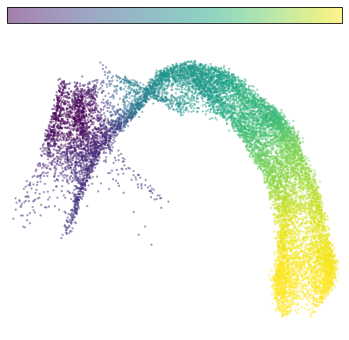

In [13]:
# plot pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

The connection network below is another way to display pseudotime. The edge lengths indicate the time difference between nodes (the closer in pseudotime, the shorter the edge length). The sizes of the nodes are proportional to the 
pseudotime.

## Pseudotime of gene

Let’s visualize the spliced RNA abundance of some sample genes based on pseudotime with ```celldancer.plotting.gene.scatter_gene()```.

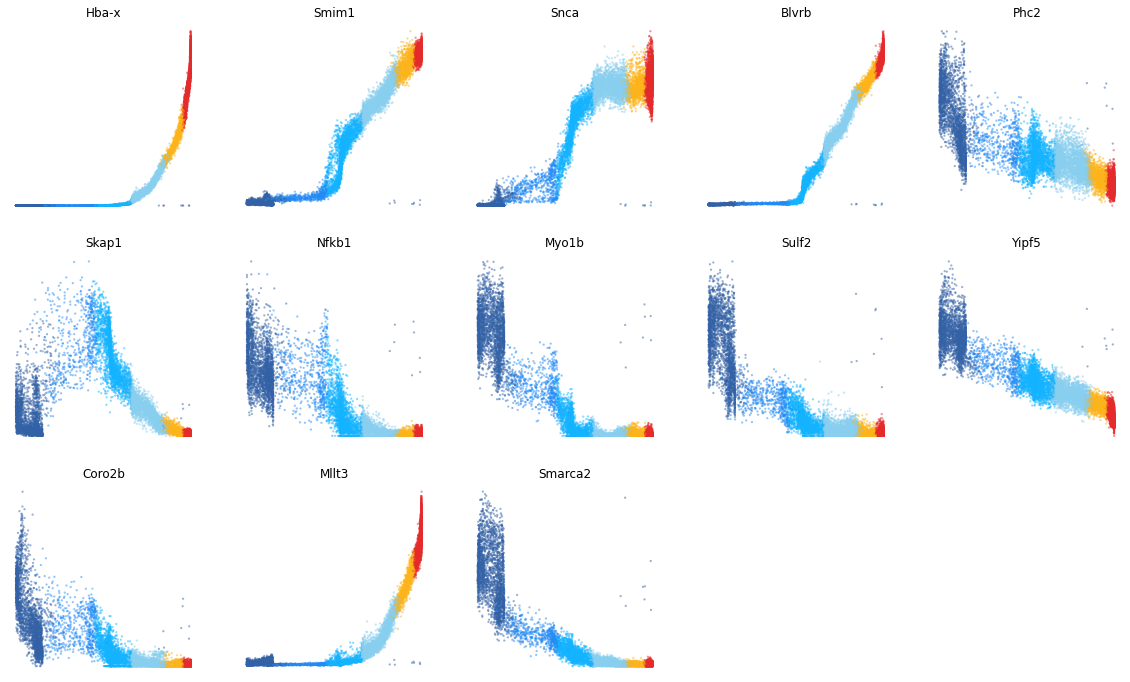

In [15]:
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

In [16]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN,0.535088
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN,0.510724
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069,2,0.076165,0.062329,0.513171
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825,3,NaN,NaN,0.620917
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN,0.552556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN,0.980747
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN,0.992712
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN,0.982264
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN,0.981106


In [18]:
onegene=cellDancer_df[cellDancer_df.gene_name==list(cellDancer_df.gene_name)[0]]
cell_time=onegene[['index','pseudotime']]
cell_time

,index,pseudotime
0,0,0.535088
1,1,0.510724
2,2,0.513171
3,3,0.620917
4,4,0.552556
...,...,...
12324,12324,0.980747
12325,12325,0.992712
12326,12326,0.982264
12327,12327,0.981106


In [29]:
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','pseudotime']
merged=pd.merge(cell_time_time_sort[['index']],onegene,left_on='index', right_on='index') # TODO: NOT cellIndex in the future

In [30]:
merged

,index,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,velocity1,velocity2,pseudotime
0,6131,6131,Ift81,0.032089,0.076707,0.025854,0.086128,0.023253,0.041672,0.075371,0.039626,cell_73170,Haematoendothelial progenitors,-1.608063,13.375466,NaN,NaN,0.000000
1,7165,7165,Ift81,0.026775,0.150038,0.021593,0.144790,0.019282,0.041494,0.077078,0.039626,cell_93829,Haematoendothelial progenitors,-1.713448,13.415845,NaN,NaN,0.000017
2,5891,5891,Ift81,0.022824,0.154833,0.018494,0.146351,0.018655,0.041610,0.077193,0.039626,cell_71247,Haematoendothelial progenitors,-1.564978,13.367740,-0.069122,0.235418,0.000029
3,9656,9656,Ift81,0.036721,0.153032,0.029397,0.153474,0.020161,0.041143,0.077160,0.039626,cell_124355,Haematoendothelial progenitors,-1.605606,13.365892,NaN,NaN,0.000051
4,1741,1741,Ift81,0.013050,0.092173,0.010974,0.087178,0.020404,0.042264,0.075689,0.039626,cell_22569,Haematoendothelial progenitors,-1.533110,13.446382,NaN,NaN,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,8020,8020,Ift81,0.000000,0.035244,0.000972,0.030182,0.021216,0.042977,0.074265,0.039626,cell_101134,Erythroid3,7.827641,5.563760,NaN,NaN,0.999971
12325,11094,11094,Ift81,0.023054,0.027578,0.018886,0.038606,0.024874,0.042175,0.074104,0.039626,cell_133606,Erythroid3,7.857589,5.672929,NaN,NaN,0.999971
12326,7541,7541,Ift81,0.013808,0.028377,0.011699,0.033350,0.023872,0.042478,0.074054,0.039626,cell_97194,Erythroid3,7.797422,5.624330,NaN,NaN,0.999989
12327,3915,3915,Ift81,0.007554,0.021064,0.006868,0.023028,0.023493,0.042729,0.073860,0.039626,cell_37973,Erythroid3,7.665284,5.264282,NaN,NaN,0.999989


index,6131,7165,5891,9656,1741,5175,9754,9356,10271,10217,...,3922,11289,11973,4230,11482,8020,11094,7541,3915,10888
clusters,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5


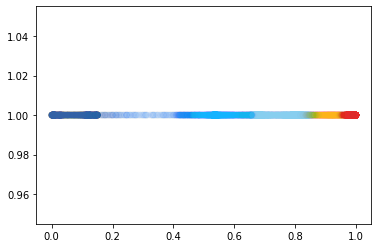

In [32]:
ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}


plt.scatter(merged.pseudotime,[1]*len(merged.pseudotime),c=merged.clusters.map(colormap_erythroid),alpha=0.01)
cluster_time_sort=pd.DataFrame(merged.clusters.map(ids))

cluster_time_sort.index=merged['index']
#cluster_time_sort.T.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort.csv')
cluster_time_sort.T

In [50]:
cell_time.to_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/pseudotime_r_0616/pseudotime.csv',index=False)




# r-square calculation - bio meaning score

In [6]:
#### heatmap

# Non-para
# https://pythonhosted.org/PyQt-Fit/NonParam_tut.html
# https://towardsdatascience.com/time-series-clustering-deriving-trends-and-archetypes-from-sequential-data-bb87783312b4

## No Haematoendothelial progenitors

In [3]:
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg


In [4]:
%autoreload 2
cell_time=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/pseudotime_r_0616/pseudotime.csv')
load_cellDancer=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/celldancer_estimation.csv')

s0_merged_part_gene,s0_merged_part_time=get_gene_s0_by_time(cell_time,load_cellDancer)

In [5]:
s0_merged_part_gene

,0610010F05Rik,1110038B12Rik,1500009L16Rik,1700017B05Rik,1700027J19Rik,1700037H04Rik,1810022K09Rik,1810026B05Rik,1810032O08Rik,2410003L11Rik,...,Zfpm1,Zmynd19,Zmynd8,Znrf1,Znrf3,Zrsr2,Zscan21,Zscan26,Zswim6,Zswim7
0,0.041881,0.007665,0.020917,0.029160,0.000000,0.005137,0.057079,0.015311,0.007116,0.000000,...,0.017061,0.000000,0.088824,0.092351,0.160487,0.055269,0.012199,0.098092,0.177840,0.051205
1,0.054448,0.008985,0.007104,0.017946,0.011604,0.004340,0.104998,0.021989,0.005647,0.002686,...,0.056244,0.000000,0.204673,0.197924,0.244216,0.042476,0.019175,0.122753,0.300959,0.050096
2,0.050658,0.018132,0.002554,0.010000,0.006229,0.000000,0.088621,0.024891,0.002103,0.003196,...,0.042635,0.000000,0.195489,0.188350,0.216799,0.051237,0.013708,0.140365,0.288972,0.053959
3,0.045993,0.015905,0.000000,0.021006,0.010454,0.000000,0.095428,0.022953,0.009053,0.002804,...,0.042006,0.000000,0.215568,0.180539,0.241601,0.043794,0.013336,0.141809,0.256472,0.057993
4,0.036534,0.026604,0.006107,0.047229,0.004356,0.000000,0.096684,0.009451,0.017987,0.000000,...,0.035670,0.000000,0.185804,0.144205,0.118621,0.058716,0.024400,0.116988,0.256359,0.068212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.026823,0.007935,0.000000,0.000000,0.000000,0.019763,0.106454,0.016029,0.008924,0.008014,...,0.111203,0.008060,0.157348,0.063507,0.140859,0.071487,0.042967,0.052830,0.006792,0.054749
12325,0.014401,0.014848,0.007067,0.000000,0.000000,0.023094,0.076111,0.020386,0.044523,0.000000,...,0.118682,0.007030,0.107615,0.078666,0.137139,0.082510,0.025229,0.073229,0.029252,0.061852
12326,0.033763,0.015520,0.008086,0.008686,0.000000,0.017251,0.094931,0.024998,0.032126,0.000000,...,0.110873,0.008835,0.092750,0.085963,0.173422,0.075742,0.000000,0.060414,0.041036,0.066953
12327,0.045732,0.006483,0.006323,0.000000,0.000000,0.020663,0.116246,0.021352,0.020211,0.000000,...,0.118049,0.006290,0.118808,0.071554,0.126196,0.091443,0.030243,0.051315,0.039211,0.104034


In [6]:
s0_merged_part_time

,index,time
0,6131,0.000000
1,7165,0.000017
2,5891,0.000029
3,9656,0.000051
4,1741,0.000051
...,...,...
12324,8020,0.999971
12325,11094,0.999971
12326,7541,0.999989
12327,3915,0.999989


In [8]:
from celldancer.utilities import *

onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
cell_idx=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)
#gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
#gene_list=['Hba-x','Smim1']
gene_list=s0_merged_part_gene.columns

r_square_non_para_list_sort,non_para_fit_heat,non_para_fit_list,sampled_idx=get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,cell_choice=cell_idx,)

In [11]:
r_square_non_para_list_sort

,gene_name,r_square,combined
1132,Nrg1,0.969248,"[0.6831667000107525, 0.6881455533476625, 0.636..."
1624,Smim1,0.956715,"[0.06960114000000002, 0.04698878000000001, 0.0..."
1408,Rbpms,0.952089,"[0.8351333408201878, 0.982474013641415, 0.9787..."
614,Frrs1,0.950577,"[0.015645627, 0.044378716000000006, 0.03874401..."
528,Etl4,0.941744,"[0.9111666211779926, 0.8392588582485868, 0.906..."
...,...,...,...
1451,Rnpep,0.001617,"[0.007224670954844095, 0.007160329872144974, 0..."
1773,Tm2d3,0.001546,"[0.007323786735692922, 0.007385214260653729, 0..."
1029,Mlxip,0.000783,"[0.03412505555544393, 0.03421547711167816, 0.0..."
790,Hoxa10,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4


/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/numpy/linalg/linalg.py:2007: RuntimeWarning: overflow encountered in true_divide
  s = divide(1, s, where=large, out=s)


_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4


/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/statsmodels/nonparametric/kernel_regression.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return R2_numer / R2_denom


_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4
_non_para_kernel_t4


/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/statsmodels/nonparametric/kernel_regression.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return R2_numer / R2_denom


In [10]:
non_para_fit_heat.to_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/pseudotime_r_0616/non_para_fit_heat_no_HP_cls.csv')

In [9]:
test=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_test=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
test[test.gene_name.isin(gene_list_test)]
#test

,gene_name,r_square,combined
1,Smim1,0.956715,"[0.06960114000000002, 0.04698878000000001, 0.0..."
6,Hba-x,0.937907,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.17..."
22,Skap1,0.907297,"[0.3705453673794552, 0.3896384990305967, 0.435..."
47,Blvrb,0.872131,"[0.016258424247572803, 0.007111563720996907, 0..."
52,Snca,0.859967,"[0.060004960000000045, 0.0767133699999954, 0.0..."
114,Mllt3,0.793066,"[0.07314497699842205, 0.04732372682720611, 0.0..."
342,Nfkb1,0.596870,"[0.06354622122344239, 0.05816299223783793, 0.0..."
438,Myo1b,0.540553,"[0.04703467699974808, 0.0312476829369952, 0.00..."
479,Coro2b,0.510779,"[0.016135083372197566, 0.011103076494934248, 0..."
942,Sulf2,0.325553,"[0.03354650752673123, 0.030124166677822604, 0...."


In [48]:
#old result
test=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_test=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
test[test.gene_name.isin(gene_list_test)]
#test

,gene_name,r_square,combined
0,Blvrb,0.994734,"[0.28839785309994603, 0.2904825529588481, 0.29..."
1,Hba-x,0.993933,"[0.020524319188183406, 0.020213650250969217, 0..."
27,Mllt3,0.982455,"[0.04591008240304323, 0.045422350901481605, 0...."
42,Smim1,0.978596,"[0.3541893991522228, 0.35356745431432834, 0.34..."
260,Skap1,0.934973,"[0.2891289128439829, 0.2912300022914671, 0.309..."
473,Snca,0.901149,"[0.5928383268080684, 0.59935123750452, 0.65605..."
722,Smarca2,0.862362,"[0.14574876345434506, 0.1455616479861371, 0.14..."
794,Yipf5,0.851359,"[1.0916678824606967, 1.0884187050253744, 1.060..."
877,Myo1b,0.835268,"[0.11856455345941802, 0.11849341747538557, 0.1..."
967,Coro2b,0.815551,"[0.057980180018314356, 0.05785114657516102, 0...."


In [12]:
r_square_non_para_list_sort.to_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/pseudotime_r_0616/r_square_non_para_list_sort.csv')


In [13]:
non_para_fit_heat

index,282,4810,6629,6884,4383,4509,4671,448,187,4397,...,7449,7694,3930,11886,3888,11604,4336,3761,3949,11854
0610010F05Rik,0.063633,0.074416,6.910864e-02,6.812124e-02,0.065763,0.053961,0.052453,0.050859,0.053626,0.054951,...,2.685423e-02,2.685250e-02,2.685101e-02,2.684892e-02,2.684744e-02,2.684719e-02,2.684670e-02,2.684658e-02,2.684229e-02,2.684192e-02
1110038B12Rik,0.012671,0.009756,-6.951139e-05,5.229537e-04,0.003394,0.000009,0.011179,0.024204,0.004684,0.005597,...,6.345327e-03,6.280291e-03,6.224099e-03,6.143788e-03,6.086600e-03,6.077029e-03,6.057852e-03,6.053050e-03,5.883194e-03,5.868472e-03
1500009L16Rik,0.006445,0.005249,6.376508e-03,6.525672e-03,0.006702,0.006398,0.006193,0.005046,0.004077,0.003803,...,2.970501e-04,2.962930e-04,2.956454e-04,2.947301e-04,2.940856e-04,2.939783e-04,2.937638e-04,2.937102e-04,2.918398e-04,2.916800e-04
1700017B05Rik,0.009883,0.009753,1.183391e-02,1.222025e-02,0.012922,0.015784,0.016163,0.017140,0.017441,0.017458,...,4.187501e-03,4.185155e-03,4.183144e-03,4.180296e-03,4.178285e-03,4.177950e-03,4.177280e-03,4.177112e-03,4.171248e-03,4.170746e-03
1700027J19Rik,0.004659,0.000374,-5.057556e-08,-1.184165e-07,0.000009,0.000305,0.000557,0.002037,0.003091,0.003414,...,-9.893034e-22,-9.708046e-22,-9.551794e-22,-9.334053e-22,-9.182883e-22,-9.157890e-22,-9.108077e-22,-9.095660e-22,-8.670007e-22,-8.634326e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zrsr2,0.081580,0.115314,1.214075e-01,1.189373e-01,0.113145,0.093965,0.091430,0.085906,0.087111,0.088315,...,5.221035e-02,5.221526e-02,5.221947e-02,5.222541e-02,5.222959e-02,5.223028e-02,5.223168e-02,5.223202e-02,5.224416e-02,5.224520e-02
Zscan21,0.028767,0.026181,2.209790e-02,2.164857e-02,0.020918,0.018530,0.018230,0.017309,0.016732,0.016556,...,1.189461e-02,1.189623e-02,1.189763e-02,1.189960e-02,1.190100e-02,1.190123e-02,1.190169e-02,1.190181e-02,1.190589e-02,1.190624e-02
Zscan26,0.163609,0.140444,1.104208e-01,1.077712e-01,0.103731,0.092050,0.090601,0.085960,0.082903,0.081968,...,6.526737e-02,6.527937e-02,6.528966e-02,6.530424e-02,6.531455e-02,6.531627e-02,6.531970e-02,6.532056e-02,6.535065e-02,6.535323e-02
Zswim6,0.185260,0.151909,1.598637e-01,1.609656e-01,0.165790,0.201520,0.208452,0.237372,0.260208,0.267467,...,1.912258e-02,1.909366e-02,1.906891e-02,1.903389e-02,1.900921e-02,1.900509e-02,1.899687e-02,1.899482e-02,1.892304e-02,1.891690e-02


In [14]:
non_para_fit_list

array([[ 6.36326786e-02,  7.44155315e-02,  6.91086416e-02, ...,
         2.68465781e-02,  2.68422856e-02,  2.68419186e-02],
       [ 1.26711590e-02,  9.75567400e-03, -6.95113925e-05, ...,
         6.05305009e-03,  5.88319436e-03,  5.86847208e-03],
       [ 6.44503686e-03,  5.24855882e-03,  6.37650845e-03, ...,
         2.93710223e-04,  2.91839841e-04,  2.91680029e-04],
       ...,
       [ 1.63608811e-01,  1.40444135e-01,  1.10420780e-01, ...,
         6.53205605e-02,  6.53506474e-02,  6.53532282e-02],
       [ 1.85260167e-01,  1.51908701e-01,  1.59863700e-01, ...,
         1.89948193e-02,  1.89230372e-02,  1.89168958e-02],
       [ 4.77855082e-02,  4.49917354e-02,  2.87654103e-02, ...,
         9.46680529e-02,  9.46764367e-02,  9.46771521e-02]])

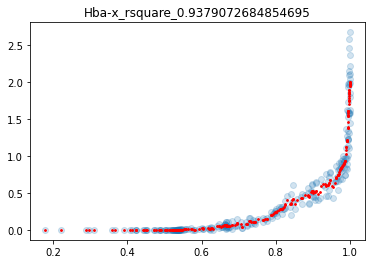

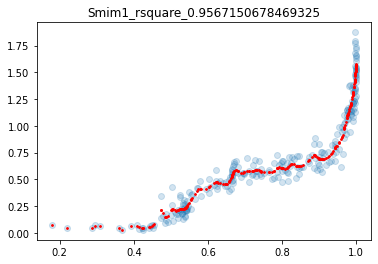

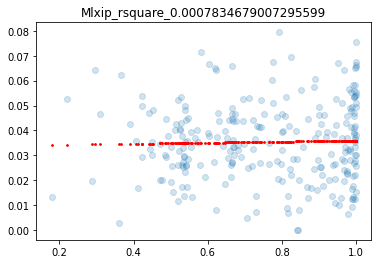

In [30]:
#gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
#gene_list_story=['Farp1','Gzmf','Bmp4']
gene_list_story=['Hba-x','Smim1','Mlxip']

for idx in range(len(gene_list_story)):
    gene_name=gene_list_story[idx]
    onerow=r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name==gene_name]
    plt.figure()
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,s0_merged_part_gene[s0_merged_part_time['index'].isin(sampled_idx)][gene_name],alpha=0.2)
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,onerow.combined.reset_index(drop=True)[0],c='red',s=3)
    plt.title(gene_name+'_rsquare_'+str(list(onerow.r_square)[0]))
    plt.show()

# sampled cell (no HP) cluster bar

In [16]:
ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}

def get_dict(load_cellDancer,ids):
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    map_dict=dict(zip(onegene.cellIndex, onegene.clusters.map(ids)))
    return(map_dict)

map_dict=get_dict(load_cellDancer,ids)
map_dict

def map_cellid_to_cluster(map_dict,cellid):
    mapped=cellid.map(map_dict)
    mapped_df=pd.DataFrame({'cluster':mapped},index=cellid).T
    return(mapped_df)
mapped_df=map_cellid_to_cluster(map_dict,non_para_fit_heat.columns)
mapped_df.to_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/pseudotime_r_0616/rsquare_point_eight_not_seperate_no_HP_cls/downsampled_cluster_bar.csv')
mapped_df


index,282,4810,6629,6884,4383,4509,4671,448,187,4397,...,7449,7694,3930,11886,3888,11604,4336,3761,3949,11854
cluster,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5


# filter rsquare by 0.8

In [17]:
r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

1132      Nrg1
1624     Smim1
1408     Rbpms
614      Frrs1
528       Etl4
         ...  
1984    Zfp608
1401    Rbfox2
925       Lhfp
35      Ablim1
1438      Rhoj
Name: gene_name, Length: 105, dtype: object

In [18]:
s0_merged_part_gene

,0610010F05Rik,1110038B12Rik,1500009L16Rik,1700017B05Rik,1700027J19Rik,1700037H04Rik,1810022K09Rik,1810026B05Rik,1810032O08Rik,2410003L11Rik,...,Zfpm1,Zmynd19,Zmynd8,Znrf1,Znrf3,Zrsr2,Zscan21,Zscan26,Zswim6,Zswim7
0,0.041881,0.007665,0.020917,0.029160,0.000000,0.005137,0.057079,0.015311,0.007116,0.000000,...,0.017061,0.000000,0.088824,0.092351,0.160487,0.055269,0.012199,0.098092,0.177840,0.051205
1,0.054448,0.008985,0.007104,0.017946,0.011604,0.004340,0.104998,0.021989,0.005647,0.002686,...,0.056244,0.000000,0.204673,0.197924,0.244216,0.042476,0.019175,0.122753,0.300959,0.050096
2,0.050658,0.018132,0.002554,0.010000,0.006229,0.000000,0.088621,0.024891,0.002103,0.003196,...,0.042635,0.000000,0.195489,0.188350,0.216799,0.051237,0.013708,0.140365,0.288972,0.053959
3,0.045993,0.015905,0.000000,0.021006,0.010454,0.000000,0.095428,0.022953,0.009053,0.002804,...,0.042006,0.000000,0.215568,0.180539,0.241601,0.043794,0.013336,0.141809,0.256472,0.057993
4,0.036534,0.026604,0.006107,0.047229,0.004356,0.000000,0.096684,0.009451,0.017987,0.000000,...,0.035670,0.000000,0.185804,0.144205,0.118621,0.058716,0.024400,0.116988,0.256359,0.068212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.026823,0.007935,0.000000,0.000000,0.000000,0.019763,0.106454,0.016029,0.008924,0.008014,...,0.111203,0.008060,0.157348,0.063507,0.140859,0.071487,0.042967,0.052830,0.006792,0.054749
12325,0.014401,0.014848,0.007067,0.000000,0.000000,0.023094,0.076111,0.020386,0.044523,0.000000,...,0.118682,0.007030,0.107615,0.078666,0.137139,0.082510,0.025229,0.073229,0.029252,0.061852
12326,0.033763,0.015520,0.008086,0.008686,0.000000,0.017251,0.094931,0.024998,0.032126,0.000000,...,0.110873,0.008835,0.092750,0.085963,0.173422,0.075742,0.000000,0.060414,0.041036,0.066953
12327,0.045732,0.006483,0.006323,0.000000,0.000000,0.020663,0.116246,0.021352,0.020211,0.000000,...,0.118049,0.006290,0.118808,0.071554,0.126196,0.091443,0.030243,0.051315,0.039211,0.104034


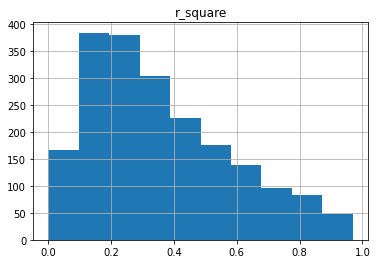

In [19]:
r_square_non_para_list_sort.hist('r_square')
r_square_non_para_list_sort=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name.isin(s0_merged_part_gene.columns)]
point_eight_rsquare_gene_name=r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat_point_eight=non_para_fit_heat[non_para_fit_heat.index.isin(point_eight_rsquare_gene_name)]
non_para_fit_heat_point_eight.columns=s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)]['index']
#non_para_fit_heat_point_eight.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_fit_rsquare_0.8.heat_no_HP_cls.csv')
#r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rwquare_0.8.heat.csv')

In [29]:
r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.0]

,gene_name,r_square,combined
0,Nrg1,0.969248,"[0.6831667000107525, 0.6881455533476625, 0.636..."
1,Smim1,0.956715,"[0.06960114000000002, 0.04698878000000001, 0.0..."
2,Rbpms,0.952089,"[0.8351333408201878, 0.982474013641415, 0.9787..."
3,Frrs1,0.950577,"[0.015645627, 0.044378716000000006, 0.03874401..."
4,Etl4,0.941744,"[0.9111666211779926, 0.8392588582485868, 0.906..."
...,...,...,...
1993,Txndc5,0.005157,"[0.018078614012186245, 0.018263765227080175, 0..."
1994,Cdk2ap1,0.004239,"[0.010436395556325057, 0.010331329513635794, 0..."
1995,Rnpep,0.001617,"[0.007224670954844095, 0.007160329872144974, 0..."
1996,Tm2d3,0.001546,"[0.007323786735692922, 0.007385214260653729, 0..."


In [22]:
non_para_fit_heat_point_eight_all_cell=s0_merged_part_gene[point_eight_rsquare_gene_name].T
#non_para_fit_heat_point_eight_all_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rsquare_0.8.heat_all_cell.csv')
non_para_fit_heat_point_eight_all_cell[0:7]

,0,1,2,3,4,5,6,7,8,9,...,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328
Nrg1,0.459819,0.321783,0.298009,0.270550,0.173911,0.213957,0.195012,0.238864,0.371471,0.472163,...,0.011093,0.012899,0.017717,0.000000,0.016381,0.009840,0.021613,0.007890,0.006652,0.000000
Smim1,0.017058,0.016805,0.007363,0.015150,0.000000,0.007657,0.000000,0.012003,0.014378,0.000000,...,1.538035,1.462654,1.302956,1.633861,1.417703,1.692898,1.470972,1.804649,1.685576,1.551586
Rbpms,1.335033,0.929266,1.104402,0.993951,1.375910,1.248221,1.264649,1.475727,1.006210,1.447389,...,0.019869,0.017918,0.010210,0.007308,0.017304,0.034639,0.013783,0.007901,0.025049,0.022163
Frrs1,0.034143,0.046187,0.065981,0.053982,0.062923,0.016948,0.022056,0.032739,0.048633,0.051892,...,0.990996,0.974162,0.934292,1.010084,0.879163,1.099697,0.935065,0.859616,1.001508,1.027058
Etl4,0.950105,0.449467,0.529430,0.470525,0.678806,0.704527,0.776007,0.740812,0.614545,0.972399,...,0.020886,0.033110,0.026998,0.030882,0.032633,0.029490,0.029868,0.024456,0.021177,0.037154
Fbn2,0.631606,0.424187,0.541418,0.427090,0.656755,0.540526,0.520804,0.507357,0.483805,0.599316,...,0.007087,0.007175,0.000000,0.006522,0.009419,0.000000,0.000000,0.000000,0.000000,0.017322
Hba-x,0.000000,0.000000,0.000000,0.000000,0.005566,0.005870,0.006248,0.004382,0.000000,0.000000,...,2.106891,1.763623,1.563619,1.943756,1.723523,1.851573,1.754467,1.816600,2.128022,1.802039


In [21]:
no_HP_rsquare_point_eight_heat_trend_line_morp_order=pd.read_table('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10.gct',index_col=0)
no_HP_rsquare_point_eight_heat_trend_line_morp_order

,k_means_6,k_means_10,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,...,11745.00,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00
id,,,,,,,,,,,,,,,,,,,,,
Abhd16a,1.0,1.0,0.38,0.40,0.41,0.43,0.47,0.48,0.54,0.56,...,0.24,0.24,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23
Actl6a,2.0,1.0,3.91,3.90,3.89,3.88,3.88,3.88,3.90,3.90,...,1.62,1.61,1.56,1.56,1.53,1.51,1.50,1.49,1.48,1.47
Acvr2b,1.0,1.0,0.86,0.85,0.85,0.84,0.83,0.83,0.79,0.78,...,0.07,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05
Adss,1.0,1.0,2.91,2.91,2.91,2.91,2.90,2.90,2.85,2.83,...,0.66,0.66,0.64,0.64,0.63,0.62,0.62,0.61,0.61,0.61
Ammecr1l,1.0,1.0,0.29,0.30,0.30,0.29,0.27,0.27,0.29,0.29,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tmem14c,3.0,10.0,3.20,3.20,3.22,3.26,3.44,3.46,3.74,3.82,...,28.41,28.42,28.46,28.47,28.48,28.50,28.50,28.51,28.52,28.52
Tmod1,3.0,10.0,0.00,0.00,0.01,0.01,0.01,0.02,0.01,0.02,...,0.97,0.97,0.99,0.99,1.00,1.00,1.00,1.01,1.01,1.01
Trim10,3.0,10.0,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,...,2.37,2.36,2.33,2.33,2.32,2.31,2.30,2.29,2.28,2.28


In [22]:
gene_sort=no_HP_rsquare_point_eight_heat_trend_line_morp_order.index

s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')

s0_heatmap_raw=s0_heatmap_raw.T
s0_heatmap_raw

cellIndex,0,1,2,3,4,5,6,7,8,9,...,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328
gene_name,,,,,,,,,,,,,,,,,,,,,
0610010F05Rik,0.312842,0.246910,0.168916,0.098369,0.116754,0.193911,0.255794,0.166934,0.092309,0.187102,...,0.051142,0.061666,0.040008,0.106277,0.065788,0.082322,0.039810,0.029527,0.028998,0.042932
1110038B12Rik,1.355268,1.420308,1.079459,1.904841,1.416954,1.224898,1.082312,0.954368,0.964514,1.359465,...,0.485764,0.640474,0.700184,1.317336,1.350453,0.551254,0.602661,0.742363,0.635604,0.758561
1500009L16Rik,0.622760,0.870611,0.638548,0.443685,0.486867,0.966799,1.115119,0.859408,0.643850,0.887406,...,0.067027,0.079232,0.053759,0.280404,0.325684,0.138677,0.042346,0.102660,0.070597,0.137588
1700017B05Rik,0.114831,0.060433,0.060933,0.137706,0.124115,0.150768,0.057764,0.139419,0.241332,0.105142,...,0.020730,0.092907,0.054964,0.164896,0.086774,0.121784,0.040416,0.089212,0.047425,0.188317
1700027J19Rik,0.721873,1.004247,1.007857,0.494196,0.599960,0.716323,0.833474,0.678904,0.725359,0.957638,...,0.005461,0.026175,0.009541,1.661138,0.123318,0.032495,0.024868,0.010656,0.006464,0.020039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zrsr2,0.936427,1.057224,0.837642,0.681012,0.695128,0.960495,0.885461,0.961065,1.105348,0.936473,...,0.208157,0.245828,0.194668,0.622178,0.543882,0.255452,0.204272,0.230350,0.236227,0.234467
Zscan21,0.185909,0.177920,0.166337,0.188783,0.151390,0.327564,0.172598,0.464385,0.417202,0.129500,...,0.144760,0.180347,0.126890,0.109089,0.141033,0.238511,0.171801,0.150204,0.091715,0.144220
Zscan26,0.020677,0.000000,0.011003,0.025781,0.000000,0.024406,0.026449,0.020705,0.025665,0.006099,...,0.009148,0.049160,0.003967,0.028578,0.037592,0.004707,0.004991,0.000000,0.013641,0.005487


In [23]:
cell_idx_no_HP=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)

s0_heatmap_raw=s0_heatmap_raw[s0_merged_part_time[s0_merged_part_time['index'].isin(cell_idx_no_HP)]['index']]
s0_heatmap_raw['genename']=s0_heatmap_raw.index

no_HP_rsquare_point_eight_heat_trend_line_morp_order['genename']=no_HP_rsquare_point_eight_heat_trend_line_morp_order.index

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
no_HP_rsquare_point_eight_heat_trend_line_morp_order

,k_means_6,k_means_10,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,...,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00,genename
id,,,,,,,,,,,,,,,,,,,,,
Abhd16a,1.0,1.0,0.38,0.40,0.41,0.43,0.47,0.48,0.54,0.56,...,0.24,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,Abhd16a
Actl6a,2.0,1.0,3.91,3.90,3.89,3.88,3.88,3.88,3.90,3.90,...,1.61,1.56,1.56,1.53,1.51,1.50,1.49,1.48,1.47,Actl6a
Acvr2b,1.0,1.0,0.86,0.85,0.85,0.84,0.83,0.83,0.79,0.78,...,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05,Acvr2b
Adss,1.0,1.0,2.91,2.91,2.91,2.91,2.90,2.90,2.85,2.83,...,0.66,0.64,0.64,0.63,0.62,0.62,0.61,0.61,0.61,Adss
Ammecr1l,1.0,1.0,0.29,0.30,0.30,0.29,0.27,0.27,0.29,0.29,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,Ammecr1l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tmem14c,3.0,10.0,3.20,3.20,3.22,3.26,3.44,3.46,3.74,3.82,...,28.42,28.46,28.47,28.48,28.50,28.50,28.51,28.52,28.52,Tmem14c
Tmod1,3.0,10.0,0.00,0.00,0.01,0.01,0.01,0.02,0.01,0.02,...,0.97,0.99,0.99,1.00,1.00,1.00,1.01,1.01,1.01,Tmod1
Trim10,3.0,10.0,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,...,2.36,2.33,2.33,2.32,2.31,2.30,2.29,2.28,2.28,Trim10


In [25]:
merged=pd.merge(no_HP_rsquare_point_eight_heat_trend_line_morp_order['genename'],s0_heatmap_raw,on='genename')
#merged.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_rsquare_0.8.heat_no_HP.csv', index=False)
#s0_heatmap_raw.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/point_eight_k_pearson_k6_trend_line_all_cell.csv',index=False)
merged

,genename,400,4802,6769,4543,4758,4421,4851,6610,6607,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
0,Abhd16a,0.412748,0.331164,0.290473,0.381085,0.359499,0.422851,0.277034,0.396213,0.317614,...,0.294592,0.202515,0.207560,0.243239,0.284812,0.247320,0.257767,0.270191,0.243669,0.211366
1,Actl6a,3.877499,4.087953,3.720115,4.179265,3.963922,3.860403,4.210298,3.925261,3.755981,...,1.509015,1.264778,1.336434,1.497797,1.412641,1.250936,1.320378,1.404000,1.332335,1.338036
2,Acvr2b,0.808786,0.750717,0.834348,0.764101,0.938699,0.910351,0.895283,0.835232,0.897377,...,0.057165,0.041104,0.023751,0.038855,0.041003,0.040701,0.030657,0.034704,0.040632,0.062221
3,Adss,2.901829,2.743523,2.205427,2.844265,2.699765,2.971019,2.692523,2.913272,2.455237,...,0.600645,0.552270,0.475239,0.628446,0.598506,0.580363,0.575916,0.648302,0.580709,0.559741
4,Ammecr1l,0.220746,0.310054,0.237129,0.330180,0.317690,0.286255,0.226035,0.320088,0.327121,...,0.099032,0.078465,0.101372,0.083780,0.102391,0.083741,0.093345,0.088655,0.090335,0.089452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Tmem14c,3.695666,3.169179,3.572033,3.005523,3.108299,3.116515,3.314383,3.209562,3.752554,...,28.031555,28.428867,28.451462,28.428474,28.009320,28.290705,28.514296,28.583807,28.822367,28.832900
1017,Tmod1,0.000000,0.000000,0.000000,0.003675,0.000000,0.000000,0.022694,0.000000,0.007884,...,1.060639,1.048686,0.811260,0.976028,1.063485,1.049461,0.956105,1.050819,0.996605,1.019575
1018,Trim10,0.004025,0.013750,0.000000,0.000000,0.017511,0.003888,0.027836,0.000000,0.021946,...,2.348661,2.295867,2.107942,2.194609,2.166462,2.275257,2.243190,2.295411,2.235307,2.248435
1019,Tspan33,0.347547,0.176020,0.115665,0.116071,0.302258,0.245856,0.264824,0.230212,0.250806,...,1.244604,1.222427,1.249040,1.353803,1.294013,1.261178,1.322758,1.243145,1.311663,1.313552


# get the cluster for no-NP cells

In [26]:
mapped_cluster_df_all_cell_no_HP=map_cellid_to_cluster(map_dict,merged.columns[1:])
# mapped_cluster_df_all_cell_no_HP.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_non_para_s0_sortByK10_rsquare_0.8.heat_no_HP_mapped_cluster_df_all_cell_no_HP.csv')
mapped_cluster_df_all_cell_no_HP

,400,4802,6769,4543,4758,4421,4851,6610,6607,6793,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
cluster,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5


In [27]:
mapped_df

index,82,4810,2091,6763,4735,4383,6626,272,6637,6542,...,11745,7449,4251,11937,3936,11780,4141,7691,3930,12093
cluster,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5


## 1. reorder no_HP_rsquare_point_eight_heat_trend_line_morp_order

In [28]:
cluster_by_10=no_HP_rsquare_point_eight_heat_trend_line_morp_order

cluster_4=cluster_by_10[cluster_by_10.k_means_10==1]
cluster_8=cluster_by_10[cluster_by_10.k_means_10==2]
cluster_3=cluster_by_10[cluster_by_10.k_means_10==3]
cluster_1=cluster_by_10[cluster_by_10.k_means_10==4]
cluster_6=cluster_by_10[(cluster_by_10.k_means_10==5) | (cluster_by_10.k_means_10==7)]
cluster_5=cluster_by_10[cluster_by_10.k_means_10==6]
cluster_2=cluster_by_10[(cluster_by_10.k_means_10==8) | (cluster_by_10.k_means_10==9)]
cluster_7=cluster_by_10[cluster_by_10.k_means_10==10]

cluster_by_10_sort_list=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8]

cluster_by_10_sort=pd.DataFrame()
for enu,i in enumerate(cluster_by_10_sort_list):
    if enu==0:
        cluster_by_10_sort=i
    else:
        cluster_by_10_sort=cluster_by_10_sort.append(i)
    print(len(i))
cluster_by_10_sort.shape
#cluster_by_10.shape

150
97
254
249
118
54
47
52


(1021, 248)

## 1.1 output genename to do david

In [29]:
for enu,cluster in enumerate(cluster_by_10_sort_list):
    cluster.index
    pd.DataFrame(cluster.index).to_csv(('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_david/gene_in_cluster'+str(enu+1)+'.csv'),header=False,index=False)

## 1.2 bar_reorder_cluster_in_10

In [30]:
cluster_overall= np.array([])

for enu,i in enumerate(cluster_by_10_sort_list):
    cluster_num = np.array([enu+1])
    cluster_num_times=np.tile(cluster_num,len(i))
    cluster_overall=np.append(cluster_overall, cluster_num_times)
print(cluster_overall.shape)
cluster_overall_df=pd.DataFrame({'cluster_of_10':cluster_overall})
#cluster_overall_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/bar_reorder_cluster_in_10.csv')

(1021,)


In [31]:
cluster_overall_df

,cluster_of_10
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1016,8.0
1017,8.0
1018,8.0
1019,8.0


In [32]:
cluster_by_10_sort

,k_means_6,k_means_10,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,...,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00,genename
id,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,6.0,4.0,0.28,0.26,0.25,0.23,0.20,0.20,0.16,0.15,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3632451O06Rik
Ablim1,6.0,4.0,0.57,0.56,0.55,0.54,0.50,0.50,0.44,0.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Ablim1
Afdn,6.0,4.0,0.58,0.55,0.53,0.51,0.45,0.44,0.37,0.35,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,Afdn
Amot,6.0,4.0,0.42,0.43,0.43,0.44,0.43,0.43,0.39,0.38,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,Amot
Amotl1,6.0,4.0,0.11,0.10,0.11,0.11,0.10,0.10,0.07,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Amotl1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,4.0,2.0,2.46,2.51,2.49,2.41,2.10,2.08,2.07,2.02,...,3.27,3.26,3.26,3.25,3.24,3.24,3.23,3.23,3.23,Slc2a1
Slc4a1,4.0,2.0,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,...,2.26,2.31,2.31,2.34,2.35,2.37,2.38,2.39,2.39,Slc4a1
St3gal6,4.0,2.0,0.26,0.25,0.25,0.24,0.21,0.21,0.17,0.16,...,0.72,0.74,0.74,0.75,0.76,0.77,0.77,0.78,0.78,St3gal6


In [33]:
reorder_k_10=cluster_by_10_sort[cluster_by_10_sort.columns[2:-1]]
#reorder_k_10.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10_reorder.csv')
reorder_k_10

,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,1211.00,10262.00,...,11745.00,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00
id,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,0.28,0.26,0.25,0.23,0.20,0.20,0.16,0.15,0.12,0.11,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ablim1,0.57,0.56,0.55,0.54,0.50,0.50,0.44,0.42,0.36,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Afdn,0.58,0.55,0.53,0.51,0.45,0.44,0.37,0.35,0.29,0.28,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
Amot,0.42,0.43,0.43,0.44,0.43,0.43,0.39,0.38,0.35,0.34,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
Amotl1,0.11,0.10,0.11,0.11,0.10,0.10,0.07,0.06,0.09,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,2.46,2.51,2.49,2.41,2.10,2.08,2.07,2.02,1.94,1.93,...,3.27,3.27,3.26,3.26,3.25,3.24,3.24,3.23,3.23,3.23
Slc4a1,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,...,2.24,2.26,2.31,2.31,2.34,2.35,2.37,2.38,2.39,2.39
St3gal6,0.26,0.25,0.25,0.24,0.21,0.21,0.17,0.16,0.16,0.17,...,0.71,0.72,0.74,0.74,0.75,0.76,0.77,0.77,0.78,0.78


# 2.match the reordered rank of gene with allcells heatmap

In [34]:
s0_heatmap_raw # this should bee kept since the cells are already ordered by time

cellIndex,400,4802,6769,4543,4758,4421,4851,6610,6607,6793,...,3930,11886,7982,11435,11122,3784,11473,11604,12093,genename
gene_name,,,,,,,,,,,,,,,,,,,,,
0610010F05Rik,0.155570,0.194810,0.132937,0.199482,0.179454,0.207584,0.223742,0.195962,0.161354,0.115241,...,0.044262,0.029431,0.050349,0.054333,0.055289,0.051791,0.047917,0.046612,0.058128,0610010F05Rik
1110038B12Rik,1.107686,1.187867,1.225331,1.176802,1.015425,1.288435,1.318333,1.380350,1.277662,1.271566,...,0.403637,0.461725,0.457142,0.434558,0.447485,0.427837,0.439269,0.396254,0.386269,1110038B12Rik
1500009L16Rik,1.017211,1.055389,0.927264,0.982797,1.037973,1.194845,1.022657,0.959702,1.146745,0.829605,...,0.034380,0.026434,0.030603,0.059106,0.041182,0.015751,0.046427,0.034097,0.036737,1500009L16Rik
1700017B05Rik,0.209772,0.149293,0.268845,0.165438,0.201807,0.215851,0.140685,0.153807,0.200860,0.219595,...,0.062164,0.027988,0.056373,0.053646,0.039584,0.049254,0.065170,0.081382,0.058216,1700017B05Rik
1700027J19Rik,0.621100,0.571700,0.687210,0.687712,0.481906,0.610636,0.630328,0.602872,0.658489,0.682819,...,0.000000,0.000000,0.000000,0.031534,0.029881,0.018468,0.000000,0.004997,0.014156,1700027J19Rik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zrsr2,0.718664,0.901558,0.957862,1.025478,0.984380,0.804070,0.932721,0.829299,0.832335,0.746123,...,0.193013,0.176189,0.191772,0.230593,0.209804,0.193006,0.227903,0.200933,0.193190,Zrsr2
Zscan21,0.264112,0.324044,0.409851,0.309417,0.256726,0.222831,0.260088,0.260965,0.301683,0.265838,...,0.123622,0.131430,0.129134,0.103691,0.113425,0.122173,0.149353,0.116318,0.132394,Zscan21
Zscan26,0.016154,0.000000,0.012263,0.025162,0.008473,0.009825,0.043197,0.000000,0.028231,0.024003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Zscan26


In [35]:
reorder_k_10_rank=reorder_k_10
reorder_k_10_rank['genename']=reorder_k_10_rank.index

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
reorder_k_10

,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,1211.00,10262.00,...,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00,genename
id,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,0.28,0.26,0.25,0.23,0.20,0.20,0.16,0.15,0.12,0.11,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3632451O06Rik
Ablim1,0.57,0.56,0.55,0.54,0.50,0.50,0.44,0.42,0.36,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Ablim1
Afdn,0.58,0.55,0.53,0.51,0.45,0.44,0.37,0.35,0.29,0.28,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,Afdn
Amot,0.42,0.43,0.43,0.44,0.43,0.43,0.39,0.38,0.35,0.34,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,Amot
Amotl1,0.11,0.10,0.11,0.11,0.10,0.10,0.07,0.06,0.09,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Amotl1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,2.46,2.51,2.49,2.41,2.10,2.08,2.07,2.02,1.94,1.93,...,3.27,3.26,3.26,3.25,3.24,3.24,3.23,3.23,3.23,Slc2a1
Slc4a1,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,...,2.26,2.31,2.31,2.34,2.35,2.37,2.38,2.39,2.39,Slc4a1
St3gal6,0.26,0.25,0.25,0.24,0.21,0.21,0.17,0.16,0.16,0.17,...,0.72,0.74,0.74,0.75,0.76,0.77,0.77,0.78,0.78,St3gal6


In [37]:
merged_reordered=pd.merge(reorder_k_10_rank['genename'],s0_heatmap_raw,on='genename')
#merged_reordered.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_reordered_rsquare_0.8.heat_no_HP.csv', index=False)
merged_reordered

,genename,400,4802,6769,4543,4758,4421,4851,6610,6607,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
0,3632451O06Rik,0.460269,0.547714,0.662784,0.639182,0.412890,0.446849,0.289543,0.430582,0.507381,...,0.000000,0.005267,0.006137,0.000000,0.000000,0.005817,0.005438,0.000000,0.006137,0.005483
1,Ablim1,0.437539,0.508333,0.401953,0.441548,0.343543,0.506206,0.420132,0.525218,0.462310,...,0.005374,0.000000,0.000000,0.005982,0.000000,0.005982,0.005593,0.000000,0.006311,0.005639
2,Afdn,0.611458,0.799459,0.818547,0.755192,0.620240,0.640561,0.659508,0.618888,0.810864,...,0.033580,0.039988,0.040968,0.028470,0.028845,0.038565,0.026054,0.015338,0.040766,0.036220
3,Amot,0.524645,0.658351,0.706745,0.557881,0.562654,0.375068,0.693639,0.402397,0.541343,...,0.077565,0.034457,0.037778,0.069454,0.039320,0.062338,0.036555,0.029549,0.046606,0.048261
4,Amotl1,0.139043,0.115425,0.120398,0.145072,0.144823,0.147142,0.159108,0.142506,0.108683,...,0.006186,0.000000,0.000000,0.000000,0.007198,0.000000,0.000000,0.007400,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Slc2a1,3.109274,3.799754,2.051065,4.132637,2.862501,2.367092,3.181409,2.866214,1.937506,...,2.907154,3.270218,3.218147,2.906249,2.846812,3.151318,3.278560,2.679825,3.266719,3.203581
1017,Slc4a1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.349594,2.367683,2.449108,2.437371,2.315186,2.435062,2.409855,2.381743,2.396260,2.365552
1018,St3gal6,0.248666,0.381527,0.370505,0.440260,0.345515,0.347577,0.315643,0.406563,0.291613,...,0.831471,0.783010,0.828622,0.794507,0.808420,0.874255,0.842958,0.765535,0.786967,0.773444
1019,Trib3,0.031698,0.022889,0.052227,0.069960,0.009426,0.066103,0.056396,0.069363,0.066748,...,0.474838,0.465986,0.444100,0.421803,0.361087,0.468976,0.438626,0.403913,0.427566,0.386662


# Pseudotime bar for heatmap

In [38]:
s0_merged_part_time_noHP=s0_merged_part_time[s0_merged_part_time['index'].isin(cell_idx_no_HP)].T
s0_merged_part_time_noHP_bar=s0_merged_part_time_noHP[s0_merged_part_time_noHP.index=='time']
s0_merged_part_time_noHP_bar.columns=s0_merged_part_time_noHP.loc['index']
#s0_merged_part_time_noHP_bar.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_pseudotime_noHP_allcell.csv')

s0_merged_part_time_noHP_bar

index,400.0,4802.0,6769.0,4543.0,4758.0,4421.0,4851.0,6610.0,6607.0,6793.0,...,11751.0,3930.0,11886.0,7982.0,11435.0,11122.0,3784.0,11473.0,11604.0,12093.0
time,0.090547,0.093773,0.097471,0.097574,0.098463,0.099639,0.10223,0.103089,0.107485,0.108458,...,0.998978,0.99908,0.99924,0.999263,0.999279,0.999351,0.999367,0.999785,0.999789,0.999826


# Amount of each cluster

In [39]:
cluster_list = [
'Haematoendothelial progenitors',
'Blood progenitors 1',
'Blood progenitors 2',
'Erythroid1',
'Erythroid2',
'Erythroid3']
for i in range(6):
    print(cluster_list[i]+": "+str(len(onegene[onegene.clusters==cluster_list[i]])))

Haematoendothelial progenitors: 2514
Blood progenitors 1: 623
Blood progenitors 2: 2460
Erythroid1: 2929
Erythroid2: 1106
Erythroid3: 2697
0.9475129177920063
0.5438388026031805
0.6990554934459201
0.889686668410346
0.9069923398245071
0.9727263404447991
0.984509653670078
0.6514956232677371
0.2903790813605101
0.5969066094570536
0.937858962910143
0.635452584484444
0.7975201811311025
0.9377189430298986
0.8611689293880159
0.7356943766682621
0.5549004978493556
0.8896515024089328
0.7146095519299887
0.732173350951489
0.9824548598805234
0.7345465679574428
0.9046089128468351
0.7483068882098602
0.816633590898689
0.9317212927493101
0.5345761625367973
0.8179548275530067
0.7003065197050686
0.874483190371012
0.918249696828655
0.9627910679423811
0.7836379089288352
0.8350369272967224
0.4786239513136867
0.39482931429863033
0.8149452168525214
0.7773921839592844
0.8032655580555477
0.33551488102353483
0.8863976580502854
0.892351146633137
0.6628062150129891
0.657294721011322
0.9947335879565422
0.442955801967